# Mini Project 5-2 Explore Probability Distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this Project, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [1]:
# Import numpy, pandas, matplotlib.pyplot, statsmodels.api, and scipy
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats



A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# import modified_c4_epa_air_quality.csv
df = pd.read_csv('modified_c4_epa_air_quality.csv')

## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [4]:
# Display first 10 rows of df
print(df.head(10))


   date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   
5  2018-01-01        Hawaii      Honolulu  Not in a city   
6  2018-01-01        Hawaii      Honolulu  Not in a city   
7  2018-01-01  Pennsylvania          Erie           Erie   
8  2018-01-01        Hawaii      Honolulu       Honolulu   
9  2018-01-01      Colorado       Larimer   Fort Collins   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste 

The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [5]:
# Display number of rows, number of columns.
print(df.shape)


(260, 8)


Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

(array([ 2.,  0.,  0.,  0.,  0., 13.,  0.,  0., 58.,  0., 54.,  0.,  0.,
        28., 14., 17.,  7.,  9., 19.,  0.,  9.,  9.,  7.,  4.,  2.,  4.,
         0.,  1.,  2.,  1.]),
 array([0.        , 0.13106085, 0.26212171, 0.39318256, 0.52424342,
        0.65530427, 0.78636513, 0.91742598, 1.04848684, 1.17954769,
        1.31060854, 1.4416694 , 1.57273025, 1.70379111, 1.83485196,
        1.96591282, 2.09697367, 2.22803453, 2.35909538, 2.49015623,
        2.62121709, 2.75227794, 2.8833388 , 3.01439965, 3.14546051,
        3.27652136, 3.40758222, 3.53864307, 3.66970392, 3.80076478,
        3.93182563]),
 <BarContainer object of 30 artists>)

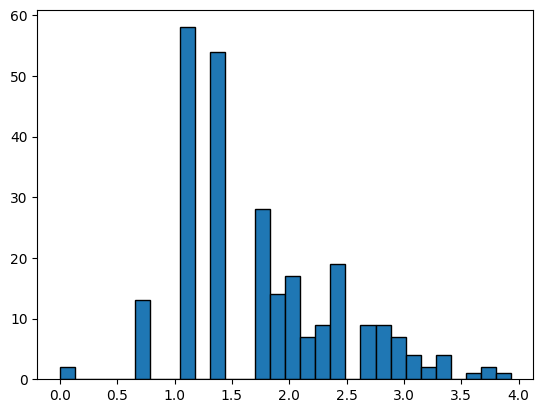

In [7]:
# Create a histogram to visualize distribution of aqi_log.
plt.hist(df['aqi_log'], bins=30, edgecolor='black')


**Question:** What do you observe about the shape of the distribution from the histogram? 

A: It is a right-tailed distribution

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [8]:
# Define variable for aqi_log mean.
aqi_log_mean = df['aqi_log'].mean()


# Print out the mean.
print("Mean of aqi_log:", aqi_log_mean)


Mean of aqi_log: 1.7669210929985582


In [9]:
# Define variable for aqi_log standard deviation.
aqi_log_std = df['aqi_log'].std(ddof=1)  # Sample standard deviation, use ddof=1 for sample std.


# Print out the standard deviation.
print("Standard deviation of aqi_log:", aqi_log_std)


Standard deviation of aqi_log: 0.7147155520223721


Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [11]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = aqi_log_mean - aqi_log_std


# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit = aqi_log_mean + aqi_log_std


# Display lower_limit, upper_limit.
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)


Lower limit: 1.052205540976186
Upper limit: 2.4816366450209304


In [13]:
# Display the percent of df that falls within 1 standard deviation of the mean.
within_1_std = df[(df['aqi_log'] >= lower_limit) & (df['aqi_log'] <= upper_limit)]
print(within_1_std.shape[0] / df.shape[0] * 100, "% of data falls within 1 standard deviation of the mean.")



76.15384615384615 % of data falls within 1 standard deviation of the mean.


Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [14]:
# Define variable for lower limit, 2 standard deviations below the mean.
lower_limit = aqi_log_mean - 2 * aqi_log_std


# Define variable for upper limit, 2 standard deviations below the mean.
upper_limit = aqi_log_mean + 2 * aqi_log_std


# Display lower_limit, upper_limit.
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)


Lower limit: 0.3374899889538139
Upper limit: 3.1963521970433026


In [15]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
within_2_std = df[(df['aqi_log'] >= lower_limit) & (df['aqi_log'] <= upper_limit)]
print(within_2_std.shape[0] / df.shape[0] * 100, "% of data falls within 2 standard deviations of the mean.")


95.76923076923077 % of data falls within 2 standard deviations of the mean.


Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [16]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit = aqi_log_mean - 3 * aqi_log_std


# Define variable for upper limit, 3 standard deviations above the mean.
upper_limit = aqi_log_mean + 3 * aqi_log_std


# Display lower_limit, upper_limit.
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)


Lower limit: -0.37722556306855815
Upper limit: 3.9110677490656744


In [18]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.
within_3_std = df[(df['aqi_log'] >= lower_limit) & (df['aqi_log'] <= upper_limit)]
print(within_3_std.shape[0] / df.shape[0] * 100, "% of data falls within 3 standard deviations of the mean.")



99.61538461538461 % of data falls within 3 standard deviations of the mean.


## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 

A: After applying the rule we discovered that the data fits a normal distribution.

**Question:** How would you use z-score to find outliers? 

A: After normalizing the data I would use the standard deviations to determine if something is more than 3 standard deviations from the mean. If it is, I would discard it as an outlier.

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [19]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
df['z_score'] = (df['aqi_log'] - aqi_log_mean) / aqi_log_std  # z-score formula: (X - mean) / std


 # ddof=degrees of freedom correction (sample vs. population)

# Display the first 5 rows to ensure that the new column was added.
print(df.head(5))




   date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure   aqi_log   z_score  
0  Parts per million  2.079442  0.437265  
1  Parts per million  1.791759  0.034753  
2  Parts per million  1.098612 -0.935070  
3  Parts per million  1.3862

Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [21]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
outliers = df[(df['z_score'] < -3) | (df['z_score'] > 3)]
print(outliers.shape[0], "outliers found.")


1 outliers found.


**Question:** What do you observe about potential outliers based on the calculations?


A: There is one outlier in the dataset

**Question:** Why is outlier detection an important part of this project? 

A: Ignoring outliers leads to much higher accuracy in predicting values.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

A: It is extremely important to find outliers and remove them from the dataset.

**What summary would you provide to audiences? Consider the distribution of the data and which sites would benefit from additional research.**

A: Almost all data points should fall within 2 std dev of the mean. It is important to note how infrequently data falls outside these bounds.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 